You are given a dataset that contains daily COVID-19 cases for five countries over a 7-day period. Each row represents a day, and each column represents a country. The data is as follows:
covid_data = np.array([ [1500, 2000, 1800, 1200, 900], # Day 1 
[1600, 2100, 1900, 1300, 950], 	# Day 2 
[1700, 2200, 2000, 1400, 1000], 	# Day 3 
[1650, 2150, 1950, 1350, 980], 	# Day 4 
[1750, 2250, 2050, 1450, 1020], 	# Day 5 
[1800, 2300, 2100, 1500, 1050], 	# Day 6 
[1900, 2400, 2200, 1600, 1100], 	# Day 7 
])
Each column corresponds to:
Country 1: Country_A
Country 2: Country_B
Country 3: Country_C
Country 4: Country_D
Country 5: Country_E
Do:
Basic Statistics:
Calculate the total number of cases reported in each country over the 7 days.
Determine the country with the highest total cases.
Daily Analysis:
Calculate the average number of cases reported per day across all countries.
Identify the day with the highest total number of cases across all countries.
Trends:
Calculate the percentage increase or decrease in cases for each country from Day 1 to Day 7.
Find the country with the highest percentage increase.
Data Transformation:
Normalize the data (scale all values between 0 and 1) for each country to compare trends more effectively.
Provide the normalized dataset.
Visualize the data:
A line chart showing daily cases for each country
Highlight the day with the highest total cases across all countries using an annotation or marker.





In [44]:

import numpy as np
import matplotlib.pyplot as plt
covid_data = np.array([ [1500, 2000, 1800, 1200, 900], # Day 1 
[1600, 2100, 1900, 1300, 950], 	# Day 2 
[1700, 2200, 2000, 1400, 1000], 	# Day 3 
[1650, 2150, 1950, 1350, 980], 	# Day 4 
[1750, 2250, 2050, 1450, 1020], 	# Day 5 
[1800, 2300, 2100, 1500, 1050], 	# Day 6 
[1900, 2400, 2200, 1600, 1100], 	# Day 7 
])

country_total = covid_data.sum(axis=0)
countries= ['Country_A', 'Country_B','Country_C','Country_D' ,'Country_E']
print("Total cases")
for i in range(5):
    print(countries[i],':',country_total[i])

i=np.where(country_total == max(country_total))
print('country with max cases:',countries[i[0][0]])


Total cases
Country_A : 11900
Country_B : 15400
Country_C : 14000
Country_D : 9800
Country_E : 7000
country with max cases: Country_B


In [47]:
average_cases = covid_data.sum(axis=0)//7
print("Average daily cases")
for i in range(5):
    print(countries[i],':',average_cases[i])

Average daily cases
Country_A : 1700
Country_B : 2200
Country_C : 2000
Country_D : 1400
Country_E : 1000


In [48]:
print("Daily Total Cases")
daily_total = covid_data.sum(axis=1)
for i in range(7):
    print ('day',i+1,':',daily_total[i])


i=np.where(daily_total == max(daily_total))
print('day with max cases:',i[0][0] + 1)

Daily Total Cases
day 1 : 7400
day 2 : 7850
day 3 : 8300
day 4 : 8080
day 5 : 8520
day 6 : 8750
day 7 : 9200
day with max cases: 7


In [ ]:
day1_cases = covid_data[0]  # First row
day7_cases = covid_data[-1]  # Last row

percent_changes = ((day7_cases - day1_cases) / day1_cases * 100).round(1)

countries = ['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5']
changes_dict = dict(zip(countries, percent_changes))


max_increase_country = max(changes_dict.items(), key=lambda x: x[1])

print("Percentage changes from Day 1 to Day 7:")
for country, change in changes_dict.items():
    print(f"{country}: {change:+.1f}%")

print(f"\nCountry with highest increase: {max_increase_country[0]} ({max_increase_country[1]:+.1f}%)")

Percentage changes from Day 1 to Day 7:
Country 1: +26.7%
Country 2: +20.0%
Country 3: +22.2%
Country 4: +33.3%
Country 5: +22.2%

Country with highest increase: Country 4 (+33.3%)


In [3]:
import numpy as np

def normalize_columns(data):
    normalized = np.zeros_like(data, dtype=float)
    
    for col in range(data.shape[1]):
        column = data[:, col]
        min_val = column.min()
        max_val = column.max()
        normalized[:, col] = (column - min_val) / (max_val - min_val)
    
    return normalized

normalized_data = normalize_columns(covid_data)

normalized_data = np.round(normalized_data, 3)

print("Normalized COVID-19 data:")
print(normalized_data)

NameError: name 'covid_data' is not defined

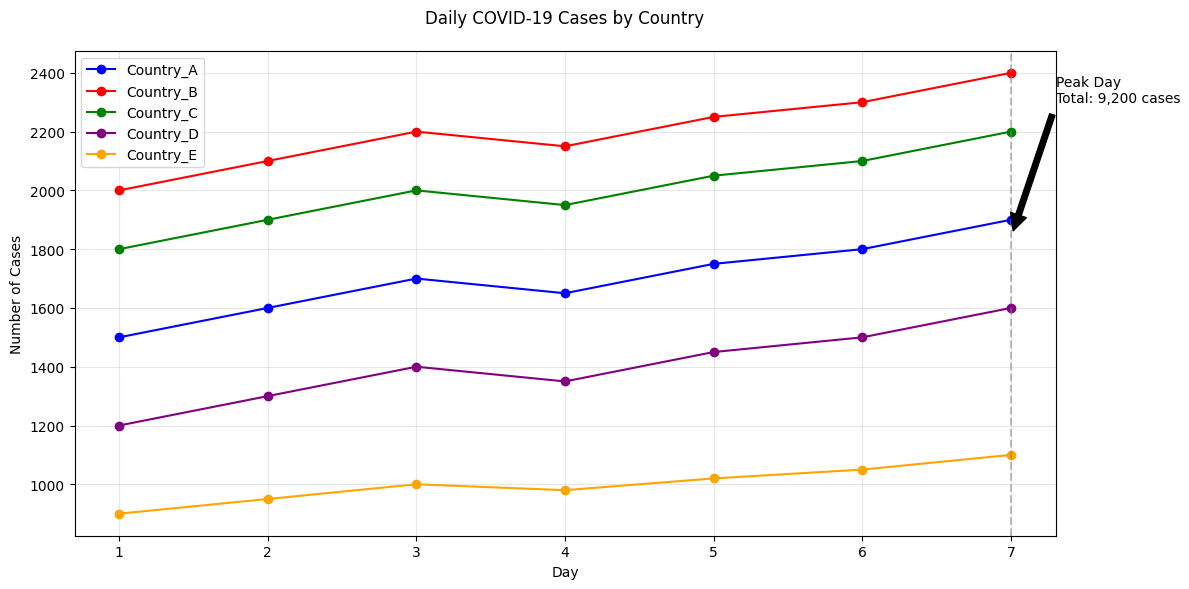

In [6]:
import matplotlib.pyplot as plt
import numpy as np

days = np.arange(1, 8)
covid_data = np.array([ [1500, 2000, 1800, 1200, 900], # Day 1 
[1600, 2100, 1900, 1300, 950], 	# Day 2 
[1700, 2200, 2000, 1400, 1000], 	# Day 3 
[1650, 2150, 1950, 1350, 980], 	# Day 4 
[1750, 2250, 2050, 1450, 1020], 	# Day 5 
[1800, 2300, 2100, 1500, 1050], 	# Day 6 
[1900, 2400, 2200, 1600, 1100], 	# Day 7 
])
countries= ['Country_A', 'Country_B','Country_C','Country_D' ,'Country_E']

daily_totals = covid_data.sum(axis=1)
peak_day = days[np.argmax(daily_totals)]
peak_total = np.max(daily_totals)


plt.figure(figsize=(12, 6))


colors = ['blue', 'red', 'green', 'purple', 'orange']
for i in range(5):
    plt.plot(days, covid_data[:, i], marker='o', label=countries[i], color=colors[i])


plt.axvline(x=peak_day, color='gray', linestyle='--', alpha=0.5)
plt.annotate(f'Peak Day\nTotal: {peak_total:,} cases', 
            xy=(peak_day, peak_total/5), 
            xytext=(peak_day+0.3, peak_total/4),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.title('Daily COVID-19 Cases by Country', pad=20)
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(days)

plt.tight_layout()
plt.show()